# <center>Тема 2. Візуальний аналіз даних
## <center>Практичне завдання. Візуальний аналіз даних по пасажирам "Титаніка".

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Считуємо дані.**

In [3]:
train_df = pd.read_csv("titanic_train.csv", 
                       index_col='PassengerId') 

In [4]:
train_df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Murdlin, Mr. Joseph",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**Викинемо признак `Cabin`, а потім – всі рядки, де є пропуски.**

In [7]:
train_df = train_df.drop('Cabin', axis=1).dropna()

**Побудуйте попарні залежності признаків `Age`, `Fare`, `Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked` і `Survived`. (метод `scatter_matrix ` Pandas або `pairplot` Seaborn).**

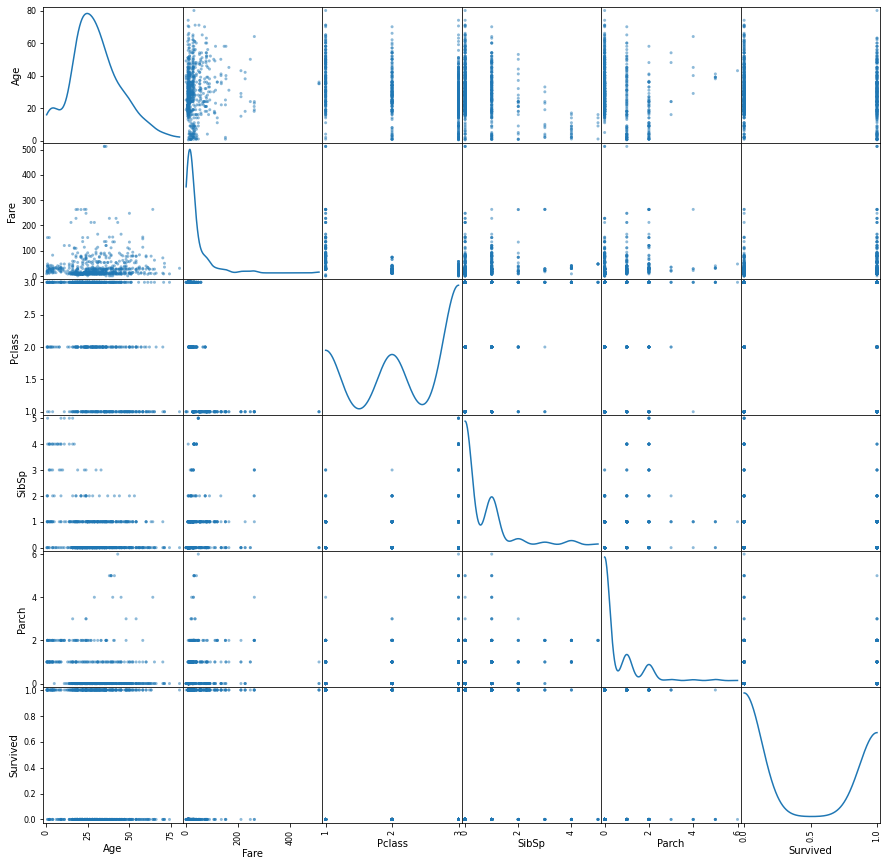

In [8]:
# Ваш код тут
pd.plotting.scatter_matrix(train_df[['Age','Fare','Pclass','Sex','SibSp','Parch','Embarked','Survived']],figsize=(15,15),diagonal='kde')
plt.show()


**Як плата за білет (`Fare`) залежить від класа каюти (`Pclass`)? Побудуйте boxplot.**

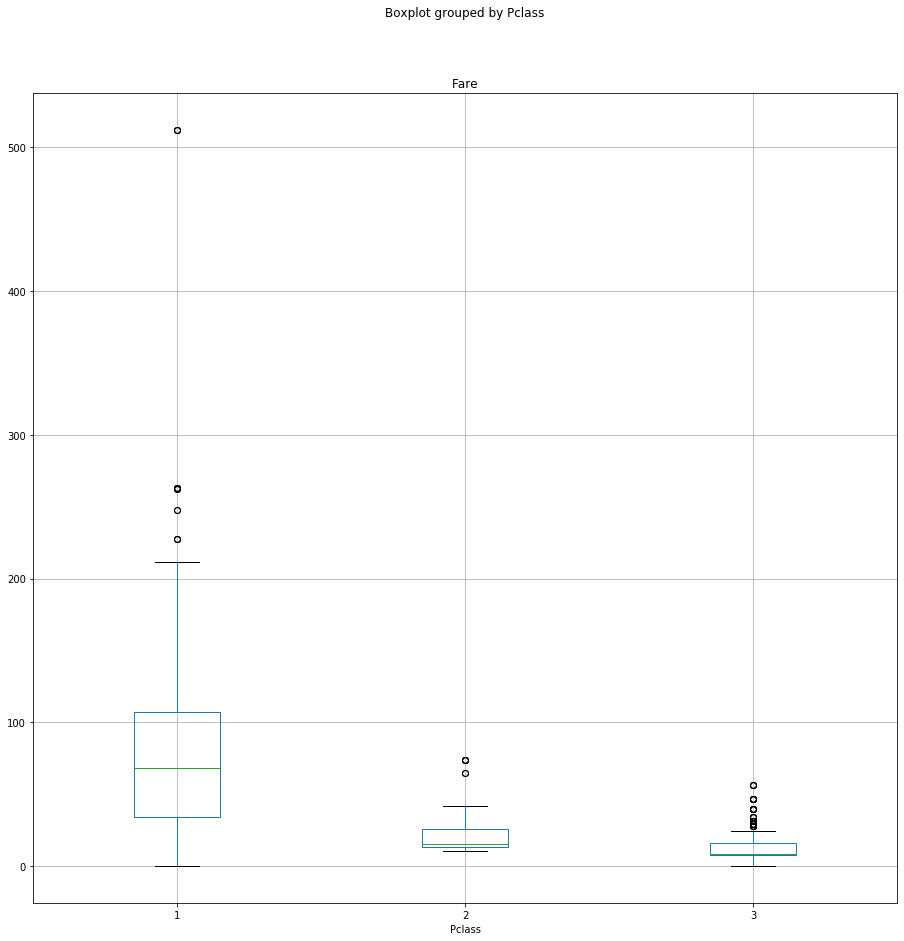

In [ ]:
# Ваш код тут
train_df.boxplot(column='Fare',by='Pclass',figsize=(15,15))
plt.show()
    

**Такий boxplot виходить не дуже красивим через викиди.** 

**Опціонально: створіть признак `Fare_no_out` (вартості без викидів), в якому немає вартості, яка відрізняється від средньої по класу больш ніж на 2 стандартних відхилення. Важливо: потрібно виключати викиди саме в залежності від класа каюти. Інакше виключатися буде тільки самі больші (1 клас) і малі (3 класс) вартості.**

In [10]:
pclass1 = train_df[train_df['Pclass'] == 1]['Fare']
pclass2 = train_df[train_df['Pclass'] == 2]['Fare']
pclass3 = train_df[train_df['Pclass'] == 3]['Fare']

fare_pclass1_no_out1 = pclass2.mean() - pclass1.std()
fare_pclass1_no_out2 = pclass2.mean() + pclass1.std()

fare_pclass2_no_out1 = pclass2.mean() - pclass2.std()
fare_pclass2_no_out2 = pclass2.mean() + pclass2.std()

fare_pclass3_no_out1 = pclass3.mean() - pclass3.std()
fare_pclass3_no_out2 = pclass3.mean() + pclass3.std()

train_df['Fare_no_out']=train_df[(train_df['Pclass']==3) & (fare_pclass3_no_out1*2 < train_df['Fare']) & (train_df['Fare'] < fare_pclass3_no_out2*2)\
                      |(train_df['Pclass']==2) & (fare_pclass2_no_out1*2 < train_df['Fare']) & (train_df['Fare'] <  fare_pclass2_no_out2*2)\
                      |(train_df['Pclass']==1) & (fare_pclass1_no_out1*2 < train_df['Fare']) & (train_df['Fare'] < fare_pclass1_no_out2*2)]['Fare']


**Яке співвідношення загинувших і виживших в залежності від статті? Зображіть з допомогою Seaborn.countplot з аргументом hue.**

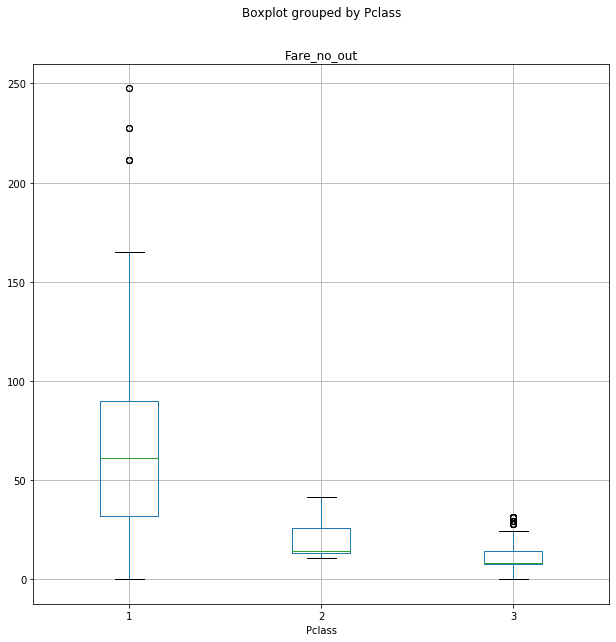

In [ ]:
train_df.boxplot(column='Fare_no_out',by='Pclass',figsize=(10,10))
plt.show()

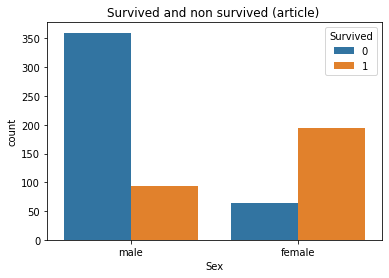

In [12]:
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title("Survived and non survived (article) ")
plt.show()

**Яке співвідношення загинувших і виживших в залежності від класа каюти? Зображіть з допомогою Seaborn.countplot з аргументом hue.**

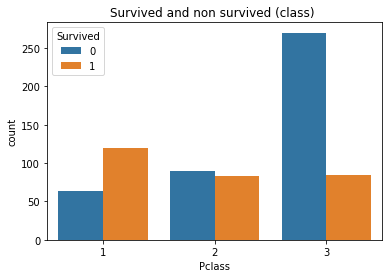

In [13]:
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title("Survived and non survived (class) ")
plt.show()

**Як факт виживання залежить від віку пасажира? Перевірте (графічно) припущення, що молоді частіше виживали. Нехай, умовно, молоді - молодше 30 років, літні – старше 60 років.**

In [25]:
def less30(age):
    if (age < 30):
        return 1
    elif (age > 60):
        return 0

In [26]:
train_df['less30'] = train_df['Age'].apply(is_young)

In [27]:
train_df.groupby('less30').count()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_no_out,young
less30,,,,,,,,,,,,
0.0,21,21,21,21,21,21,21,21,21,21,16,21
1.0,384,384,384,384,384,384,384,384,384,384,319,384


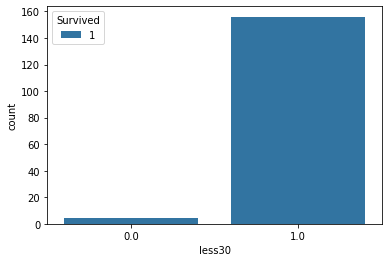

In [29]:
sns.countplot(x='less30', hue='Survived', data=train_df[train_df['Survived'] == 1])